# Analysis 2
- List of all the most common popular articles that were emailed, shared and viewed alonwith their respective dates

In [21]:
import json
import os
import operator
import numpy as np
from matplotlib import pyplot as plt

In [8]:
emailed_list = []
shared_list = []
viewed_list = []

path_emailed = os.path.expanduser('~\\midterm\\data\\nyt\\mostpopular\\Emailed')
path_shared = os.path.expanduser('~\\midterm\\data\\nyt\\mostpopular\\Shared')
path_viewed = os.path.expanduser('~\\midterm\\data\\nyt\\mostpopular\\Viewed')

for subdir, dirs, files in os.walk(path_emailed):
    for file in files:
        if(file[0] != '.'):
            try:
                received_response = open(os.path.join(subdir, file), 'r', errors = 'ignore')
                data = json.load(received_response)
    
                for y in data['results']:
                    emailed_list.append([y['title'], y['section'], y['published_date']])
                
            except:
                pass
            
for subdir, dirs, files in os.walk(path_shared):
    for file in files:
        if(file[0] != '.'):
            try:
                received_response = open(os.path.join(subdir, file), 'r', errors = 'ignore')
                data = json.load(received_response)
    
                for y in data['results']:
                    shared_list.append([y['title'], y['published_date']])
                
            except:
                pass
            
for subdir, dirs, files in os.walk(path_viewed):
    for file in files:
        if(file[0] != '.'):
            try:
                received_response = open(os.path.join(subdir, file), 'r', errors = 'ignore')
                data = json.load(received_response)
    
                for y in data['results']:
                    viewed_list.append([y['title'], y['published_date']])
                
            except:
                pass

In [9]:
list_compare1 = []

for x in emailed_list:
    for y in shared_list:
        if x[0] == y[0]:
            list_compare1.append([x[0], x[1], x[2], y[1]])

In [12]:
list_compare2 = []

for x in list_compare1:
    for y in viewed_list:
        if x[0] == y[0]:
            list_compare2.append([x[0], x[1], x[2], x[3], y[1]])
            

In [13]:
category_list = [x[1] for x in list_compare2]
category_list_unique = set(x[1] for x in list_compare2)
categ_dict = {}
categ_count = 0

for x in category_list_unique:
    for y in category_list:
        if x == y:
            categ_count = categ_count + 1
    categ_dict.update({x:categ_count})
    categ_count = 0

In [17]:
categ_dict_sorted = sorted(categ_dict.items(), key=operator.itemgetter(1), reverse = True)

In [18]:
y_values = [x[1] for x in categ_dict_sorted[:10]]
x_values = [y[0] for y in categ_dict_sorted[:10]]

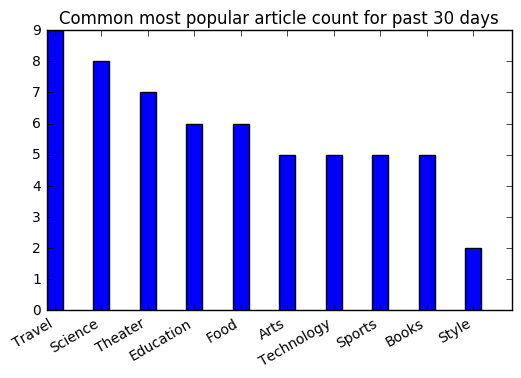

In [23]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_title("Common most popular article count for past 30 days")

width = .35
ind = np.arange(len(y_values))
plt.bar(ind, y_values, width=width)
plt.xticks(ind + width / 2, x_values)

fig.autofmt_xdate()

save_path = os.path.expanduser('~\\midterm\\que2\\ana_2\\Most popular article count.pdf')

plt.savefig(save_path)

plt.show()